配置颜色条

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [11]:
x=np.linspace(0,10,1000)
x.shape

(1000,)

In [70]:
I=np.sin(x)*np.cos(x[:,np.newaxis])
I.shape
I.min()
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

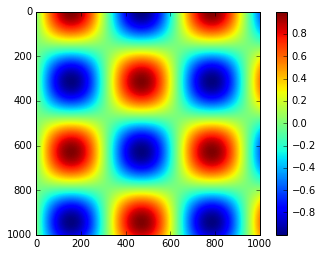

In [66]:
plt.imshow(I)
plt.colorbar()

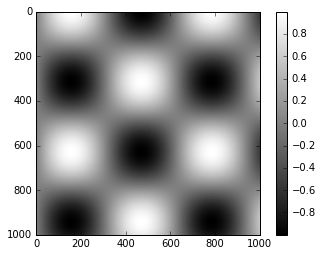

In [31]:
plt.imshow(I,cmap='gray')
plt.colorbar()

In [36]:
from matplotlib.colors import LinearSegmentedColormap

In [43]:
def grayscale_cmap(cmap):
    cmap=plt.cm.get_cmap(cmap)
    colors=cmap(np.arange(cmap.N))
    RGB_weight=[0.299,0.587,0.114]
    luminance=np.sqrt(np.dot(colors[:,:3]**2,RGB_weight))
    colors[:,:3]=luminance[:,np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name+'_gray',colors,cmap.N)

In [48]:
def view_colormap(cmap):
    cmap=plt.cm.get_cmap(cmap)
    colors=cmap(np.arange(cmap.N))
    cmap=grayscale_cmap(cmap)
    grayscale=cmap(np.arange(cmap.N))
    fig,ax=plt.subplots(2,figsize=(6,2),subplot_kw=dict(xticks=[],yticks=[]))
    ax[0].imshow([colors],extent=[0,10,0,1])
    ax[1].imshow([grayscale],extent=[0,10,0,1])

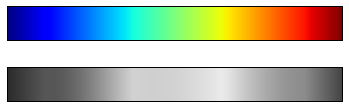

In [50]:
view_colormap('jet')

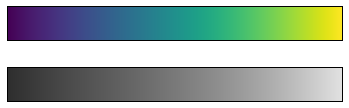

In [53]:
view_colormap('viridis')

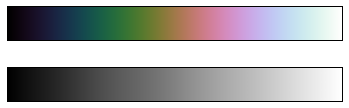

In [55]:
view_colormap('cubehelix')

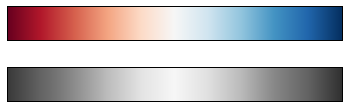

In [57]:
view_colormap('RdBu')

In [59]:
speckles=(np.random.random(I.shape)<0.01)
I[speckles]=np.random.normal(0,3,np.count_nonzero(speckles))

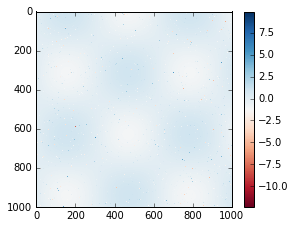

In [62]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.imshow(I,cmap='RdBu')
plt.colorbar()

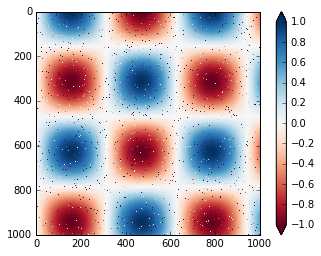

In [64]:
plt.imshow(I,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

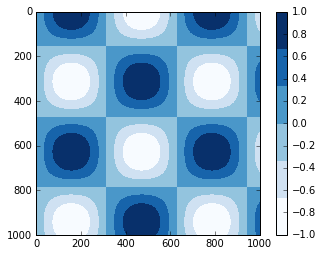

In [68]:
plt.imshow(I,cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1)